In [1]:
import sys
import warnings

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import config
import utility.df
import utility.iolib
import utility.plotlib

#env = sys.argv[1] if len(sys.argv) > 2 else "dev"

Complete loading data for subscription and lesson history!
Start preparing the time-series data for subscription.
Prepare data for active subscriptions.


100%|██████████| 1554/1554 [00:00<00:00, 11075.26it/s]


Prepare data for counts of cancellations, returns, renewals and new subscriptions.


100%|██████████| 2324/2324 [00:11<00:00, 203.56it/s]


Due to configuration, data as of unsteady period have been removed!


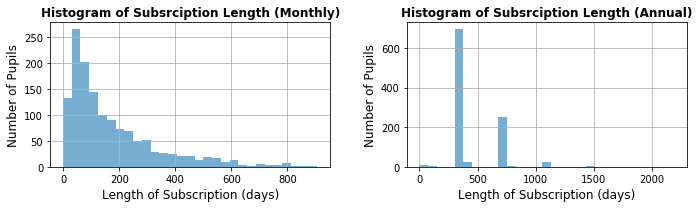

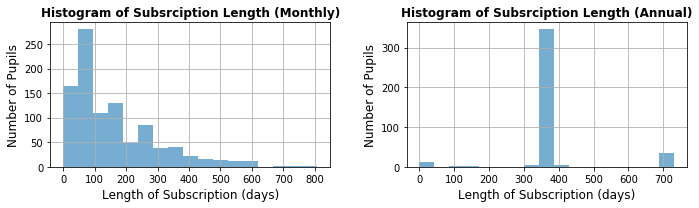

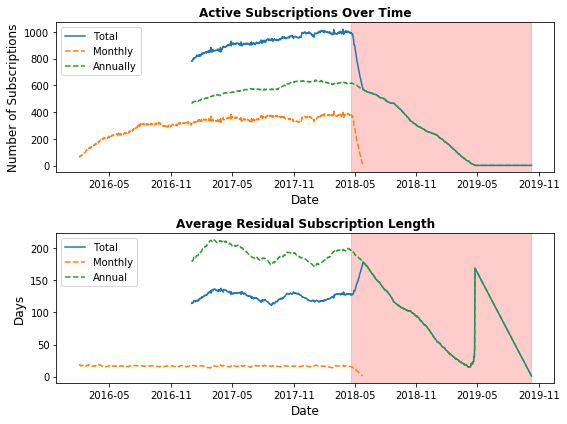

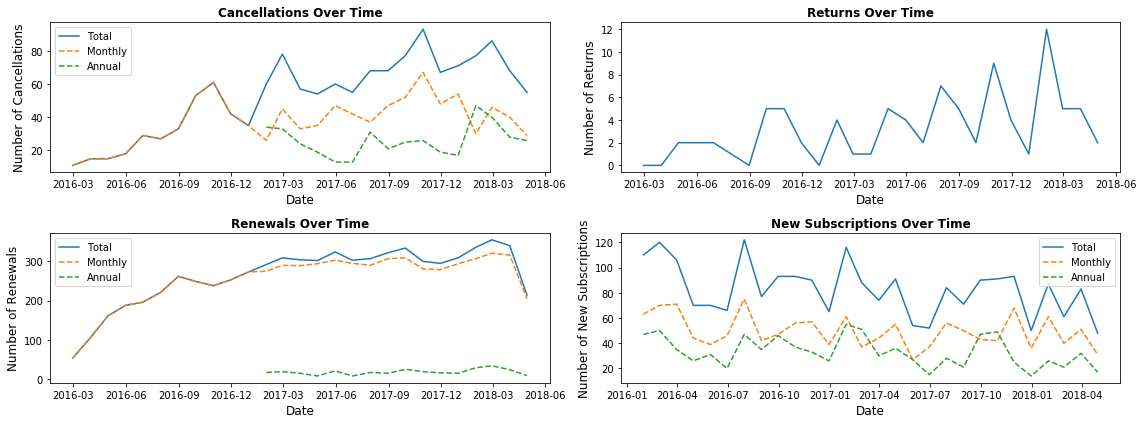

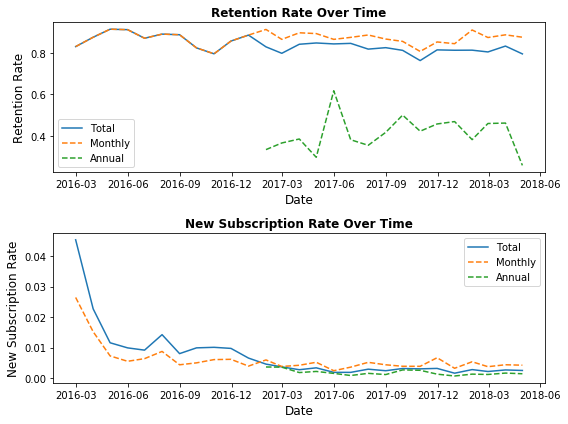

In [2]:
# Setup configuration
cfg = config.ResearchConfig
time_format = cfg.CSV_TIME_FORMAT
date_format = cfg.CSV_DATE_FORMAT
cutoff_date = pd.to_datetime(cfg.CUTOFF_DATE, format=cfg.CSV_DATE_FORMAT)

# Retrieve data
df_subspt, df_lesson, _, _ = utility.iolib.retrieve_data(cfg)
print("Complete loading data for subscription and lesson history!")

# Distribution of subscription length per pupil
utility.plotlib.subspt_dist(df_subspt, cfg)
utility.plotlib.subspt_dist_cancelled(df_subspt, cfg)

print("Start preparing the time-series data for subscription.")
df_subspt_timeseries = utility.df.subspt_timeseries(df_subspt, cfg)

# Active subscriptions over time
# Average remaining subscription length
utility.plotlib.active_subspt(df_subspt_timeseries, cfg)

# Performace of subscriptions: count of cancellations, returns, renewals and new-subscriptions
utility.plotlib.performance_count(df_subspt_timeseries, cfg)
# Performace of subscriptions: retention rate, new subscription rate
utility.plotlib.performance_ratio(df_subspt_timeseries, cfg)

In [3]:
print("Number of subscribers switching from monthly to annual = {}.".format(df_subspt_timeseries.num_rnl_m2a.sum()))
print("Number of subscribers switching from annual to monthly = {}.".format(df_subspt_timeseries.num_rnl_a2m.sum()))

Number of subscribers switching from monthly to annual = 241.0.
Number of subscribers switching from annual to monthly = 6.0.


In [7]:
df_subspt_timeseries.num_rtn_a2a.sum() + \
df_subspt_timeseries.num_rtn_a2m.sum() + \
df_subspt_timeseries.num_rtn_m2a.sum() + \
df_subspt_timeseries.num_rtn_m2m.sum()

479.0